# Codigos usados para testar funcionalidades

In [5]:
import pandas as pd

# Cria um DataFrame de exemplo
data = {'Nome': ['Alice', 'Bob', 'Charlie', 'Dave'],
        'Idade': [25, 30, 35, 40],
        'Sexo': ['F', 'M', 'M', 'M']}
df = pd.DataFrame(data)

print(df)



      Nome  Idade Sexo
0    Alice     25    F
1      Bob     30    M
2  Charlie     35    M
3     Dave     40    M


In [6]:
# Remove as linhas onde a coluna 'Sexo' é igual a 'M'
df = df.drop(df[df['Sexo'] == 'M'].index)

# Exibe o DataFrame resultante
print(df)

    Nome  Idade Sexo
0  Alice     25    F


In [7]:
import matplotlib.pyplot as plt

# Criar um DataFrame de exemplo
data = {'nome': ['João', 'Maria', 'José', 'Pedro', 'Lucas', 'Luana', 'Sofia', 'Paula', 'Laura', 'Fernando'],
        'idade': [25, 30, 21, 27, 29, 28, 31, 26, 24, 33],
        'sexo': ['M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M']}

df = pd.DataFrame(data)

print(data)


{'nome': ['João', 'Maria', 'José', 'Pedro', 'Lucas', 'Luana', 'Sofia', 'Paula', 'Laura', 'Fernando'], 'idade': [25, 30, 21, 27, 29, 28, 31, 26, 24, 33], 'sexo': ['M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M']}


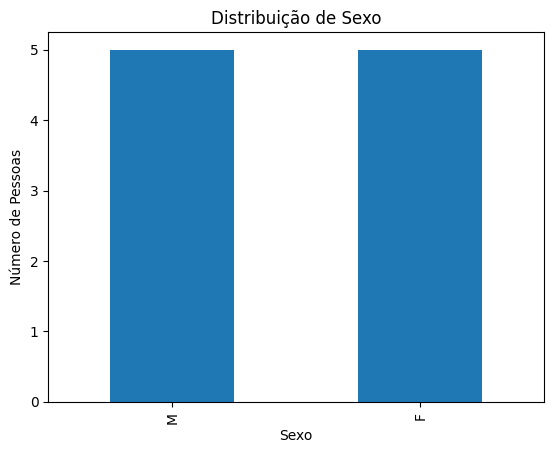

In [8]:
# Contar o número de linhas para cada valor na coluna "sexo"
counts = df['sexo'].value_counts()

# Gerar o gráfico de barras
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)

# Personalizar o gráfico
ax.set_title('Distribuição de Sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Número de Pessoas')

# Mostrar o gráfico
plt.show()


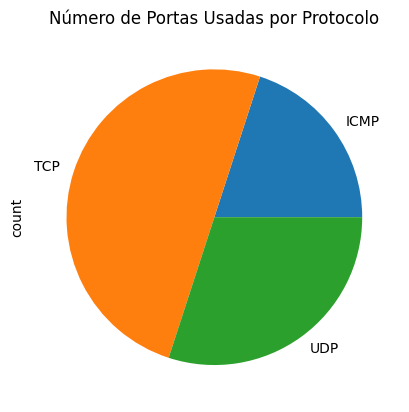

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar um DataFrame de exemplo
data = {'protocol': ['TCP', 'UDP', 'ICMP', 'TCP', 'UDP', 'TCP', 'TCP', 'UDP', 'ICMP', 'TCP'],
        'dst_port': [80, 53, 0, 8080, 123, 22, 443, 443, 0, 80]}
df = pd.DataFrame(data)

# Contar o número de portas usadas por cada protocolo
counts = df.groupby(['protocol', 'dst_port']).size().reset_index(name='count')

# Agrupar as portas por protocolo
grouped = counts.groupby('protocol')['count'].sum()

# Gerar o gráfico de pizza
fig, ax = plt.subplots()
grouped.plot(kind='pie', ax=ax)

# Personalizar o gráfico
ax.set_title('Número de Portas Usadas por Protocolo')

# Mostrar o gráfico
plt.show()


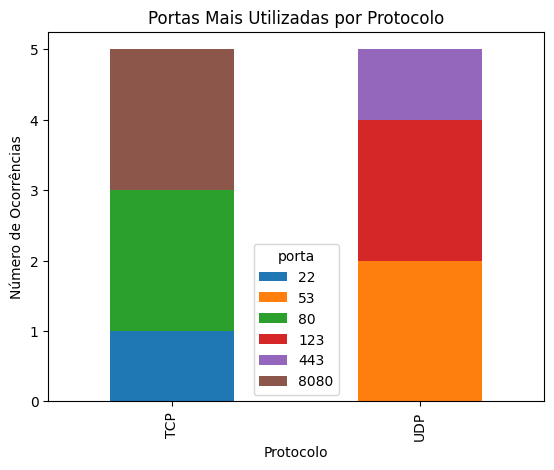

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar um DataFrame de exemplo
data = {'protocolo': ['TCP', 'UDP', 'TCP', 'TCP', 'UDP', 'TCP', 'UDP', 'UDP', 'TCP', 'TCP', 'UDP'],
        'porta': [80, 53, 8080, 443, 123, 22, 53, 443, 80, 8080, 123]}
df = pd.DataFrame(data)

# Contar o número de vezes que cada porta foi usada para cada protocolo
counts = df.groupby(['protocolo', 'porta']).size().reset_index(name='count')

# Ordenar os dados pela contagem decrescente
counts = counts.sort_values(['protocolo', 'count'], ascending=[True, False])

# Selecionar as 3 portas mais utilizadas por cada protocolo
top_ports = counts.groupby('protocolo').head(3)

# Gerar o gráfico de barras empilhadas
fig, ax = plt.subplots()
top_ports.pivot(index='protocolo', columns='porta', values='count').plot(kind='bar', stacked=True, ax=ax)

# Personalizar o gráfico
ax.set_title('Portas Mais Utilizadas por Protocolo')
ax.set_xlabel('Protocolo')
ax.set_ylabel('Número de Ocorrências')

# Mostrar o gráfico
plt.show()


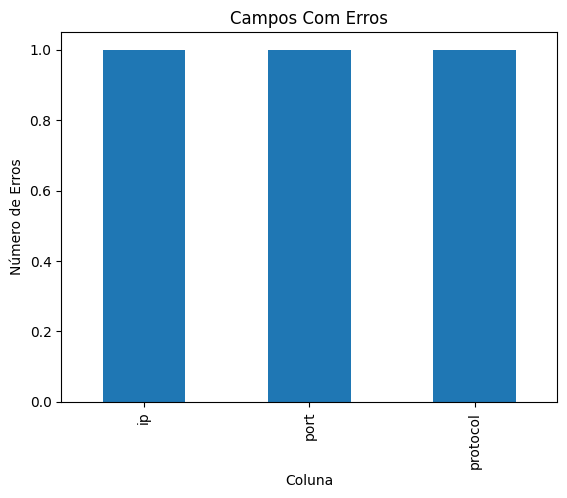

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar um DataFrame de exemplo com alguns dados nulos e errados
data = {'protocol': ['TCP', None, 'UDP', 'TCP', 'UDP', 'TCP', 'UDP'],
        'port': [80, '53', '8080', None, 123, 22, 53],
        'ip': ['192.168.1.1', '127.0.0.1', '192.168.1.2', 'invalid', '192.168.1.3', '192.168.1.4', None]}
df = pd.DataFrame(data)

# Verificar quais campos estão nulos, NaN, tipo errado ou vazios
errors = df.isnull() | df.isna() | (df['port'].apply(lambda x: isinstance(x, str) and not x.isnumeric()))

# Contar o número de erros em cada coluna
col_errors = errors.sum()

# Filtrar apenas as colunas com erros
col_errors = col_errors[col_errors != 0]

# Gerar o gráfico de barras
fig, ax = plt.subplots()
col_errors.plot(kind='bar', ax=ax)

# Personalizar o gráfico
ax.set_title('Campos Com Erros')
ax.set_xlabel('Coluna')
ax.set_ylabel('Número de Erros')

# Mostrar o gráfico
plt.show()
